## The Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1#


In [1]:
# read the data into a Pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('pima_indians_diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# define X and y
X = df[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Glucose']

In [23]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [24]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
model = RandomForestRegressor(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [25]:
# make estimations for the testing set
y_pred = model.predict(X_test)
y_pred

array([157.8       , 111.62736443,  98.28459121, 121.5157158 ,
       128.58702381, 135.76886792, 114.19460317,  95.15778997,
       120.81932247, 123.6875    , 107.74912425, 107.94328099,
        99.51886792, 141.63333333,  96.87863495, 124.74407352,
       109.41496683,  93.03321364,  81.08507246, 107.84157287,
       123.52571429,  99.66939842, 107.13452381, 106.08854885,
        91.45952407, 140.26698413, 117.06666667, 116.14004777,
       116.76987013, 116.2854816 , 111.58      , 120.87745421,
        93.46456486, 150.3       , 106.12327875, 137.4       ,
        92.38486789, 115.60913462, 109.56081681, 117.36666667,
       150.56553571, 102.48350649,  89.00065793,  90.7367433 ,
        93.74268986,  91.41264822, 152.9       , 100.85367471,
       138.03806818, 117.89555556,  78.63      , 112.47934647,
       138.00095425, 103.51341767, 121.16369048,  94.98574701,
       111.33768398, 111.55136067, 108.59294872, 137.5       ,
       163.1       ,  90.21181818, 144.1       , 123.75

In [26]:
features = X.columns
print(features)
importances = model.feature_importances_
print(importances)

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[0.07743088 0.09740777 0.09947741 0.27867811 0.14931742 0.14257796
 0.15511044]


In [27]:
df[['Insulin','Glucose']].corr()

,Insulin,Glucose
Insulin,1.000000,0.331357
Glucose,0.331357,1.000000


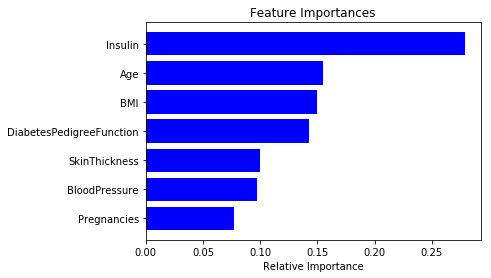

In [28]:
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()